In [1]:
import sympy as sp
import numpy as np
import matplotlib.pylab as plt
sp.init_printing()

# Muttoni Approach
Relative vertical displacement existing between crack surfaces at the level of flexural reinforcement causes activation of Dowel Action. Effective area of concrete in tension in the region around the flexural reinforcement and its flexural strength governs the capacity of doweling action that transfers shear. The vertical dowel force is given by:
\begin{equation}
    V_{Dowel} = n f_{ct,ef} b_{ef} l_{ef}
    \label{eq: V_dowel}
\end{equation}
here, $n, f_{ct,ef}, b_{ef}, l_{ef}$ represent the number of bars activated, effective tensile strength of concrete, effective width and length in which the tensile strength develops for each bar.
Effective width $b_{ef}$ accounts the fact that tensile strength distribution in concrete is not constant and it can be expressed as:
\begin{equation}
    b_{ef} =  min[ b/n - d_b; 4 c_b; 6 d_b]
    \label{eq: b_ef}
\end{equation}
Effective length $l_{ef}$ depicts the length where the pullout force is transferred to concrete. After extensive analytical and experimental research it has been concluded that it is correlated to bar diameter and assuming a constant value for this parameter is sufficient for design purposes i.e. 
\begin{equation}
    l_{ef} =  2 d_b
    \label{eq: l_ef}
\end{equation}
It is stated that effective tensile strength of concrete is strongly influenced by the state of strains in flexural reinforcement. Therefore,
\begin{equation}
    f_{ct,ef} =  k_b f_{ct}
    \label{eq: f_ctef}
\end{equation}
where, $k_b$ is a reduction factor and it follows decay for increasing strains in flexural reinforcement. The reduction factor for increasing value of strains calibrated with respect to experiments is given by:
\begin{equation}
    k_b =   0.063 \epsilon_s^{-1/4} \leq 1
    \label{eq: k_b}
\end{equation}

<img src="fig/dowel_action_muttoni.png" width="800"/>

<img src="fig/transverse_dowel_action.png" width="700"/>

In [2]:
n = sp.Symbol('n', nonnegative = True)
f_ct = sp.Symbol(r'f_{ct}', nonnegative = True)
b = sp.Symbol(r'b', nonnegative = True)
d_b = sp.Symbol(r'd_b', nonnegative = True)
c_b = sp.Symbol(r'c_b', nonnegative = True)
epsilon_s = sp.Symbol('\epsilon_s', nonnegative = True)

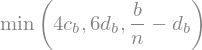

In [3]:
b_ef = sp.Min(b/n - d_b, 4 * c_b, 6 * d_b)
b_ef

In [4]:
l_ef = 2 * d_b
l_ef

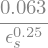

In [5]:
k_b = 0.063 * epsilon_s**(-1/4)
k_b

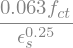

In [6]:
f_ct_ef = k_b * f_ct
f_ct_ef

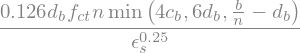

In [7]:
V_dowel = n * f_ct_ef * b_ef * l_ef
V_dowel

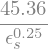

In [8]:
params = {
    n : 2, #no of bars
    c_b : 3, #mm
    d_b : 5, #mm
    b : 100, #mm
    f_ct : 3
}
V_dowel_ = V_dowel.subs(params)
V_dowel_

In [9]:
get_V_dowel = sp.lambdify((epsilon_s), V_dowel_, 'numpy')

No handles with labels found to put in legend.


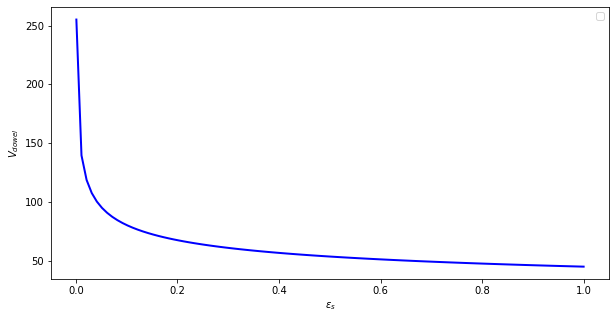

In [78]:
_, (ax1) = plt.subplots(1, 1, figsize=(10,5))
epsilon_s_ = np.linspace(0.001, 1, 100)
V_dowel = get_V_dowel(epsilon_s_)
ax1.plot(epsilon_s_, V_dowel, color='blue', lw=2);
ax1.set_xlabel(r'$\epsilon_s$'); ax1.set_ylabel(r'$V_{dowel}$')
ax1.legend()

# Baumann and Rusch Approach

According to Baumann and Rusch, the vertical displacement along the opening of the crack and the shear resistance resulting from dowel action is assumed to be linear elastic before the maximum shear force $V_{dmax}$ is reached. Thereafter, the shear resistance remains constant upon any further shear displacement. Therefore, the maximum shear force carried by dowel action is given as:
\begin{equation}
    V_{d\,max} =  1.64 b_n \phi f_c^{1/3}
    \label{eq: V_dmax}
\end{equation}
where, $b_n$ is the clear width of the beam $(b - n \phi)$. Here, $\phi, n, b$ represents diameter of bar, number of bars and width of beam respectively. 
\begin{equation}
    V_{da} =  V_{d\,max} \frac{\delta_k}{0.08}\,\mathrm{for\, \delta_k < 0.08 \,mm}
    \label{eq: V_daBR}
\end{equation}
where $\delta_k$ is vertical shear deformation.


<img src="fig/crack_kinematics.png" width="800"/>

In [55]:
b = sp.Symbol('b', nonnegative = True)
n = sp.Symbol('n', nonnegative = True)
phi = sp.Symbol(r'\phi', nonnegative = True)
f_ct = sp.Symbol(r'f_{ct}', nonnegative = True)
varphi = sp.Symbol(r'\varphi', nonnegatve = True)
y_1 = sp.Symbol(r'y_1', nonnegatve = True)
y_2 = sp.Symbol(r'y_2', nonnegatve = True)
beta_1 = sp.Symbol(r'beta_1', nonnegatve = True)
beta_2 = sp.Symbol(r'beta_2', nonnegatve = True)
epsilon_s = sp.Symbol(r'\epsilon_s', nonnegative = True)
d = sp.Symbol('d', nonnegative = True)
x_0 = sp.Symbol(r'x_0', nonnegative = True)
delta_k = sp.Symbol(r'\delta_k', nonnegative = True)

In [47]:
b_n = (b - n * phi)
b_n

In [48]:
V_dmax = 1.64 * b_n * phi * f_ct**(1/3)
V_dmax

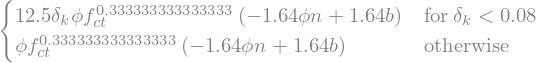

In [57]:
V_da_br = sp.Piecewise(
    (V_dmax * (delta_k/0.08), delta_k < 0.08),
    (V_dmax , delta_k >= 0.08)
    ) 
V_da_br 

In [58]:
get_V_da_br = sp.lambdify((delta_k), V_da_br.subs(params), 'numpy')
get_V_da_br

<function _lambdifygenerated(Dummy_171)>

No handles with labels found to put in legend.


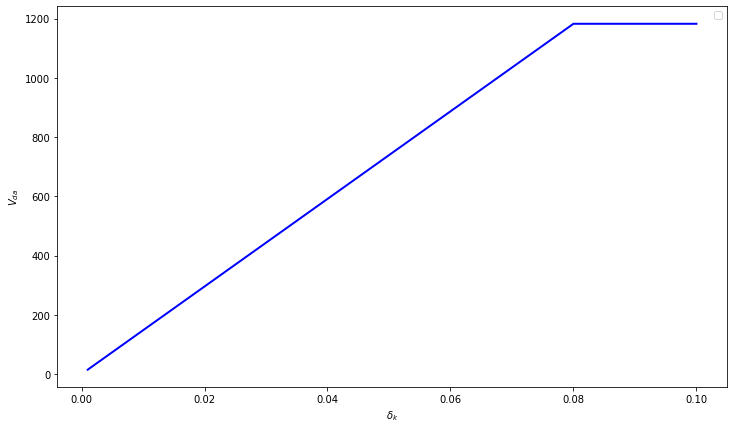

In [82]:
_, (ax1) = plt.subplots(1, 1, figsize=(12,7))
delta_k_ = np.linspace(0.001, 0.1, 100)
V_da_val_br = get_V_da_br(delta_k_)
ax1.plot(delta_k_, V_da_val_br, color='blue', lw=2);
ax1.set_xlabel(r'$\delta_k$'); ax1.set_ylabel(r'$V_{da}$')
ax1.legend()

## Martin's Approach for calculating $V_{da}$ and $\delta_k$
Peak force for pre-peak and ductile post peak dowel deformation is calculated as:
\begin{equation}
    V_{da} =  V_{d\,max} \frac{\delta_k}{0.05}\left(2 - \frac{\delta_k}{0.05}\right)\,\mathrm{for\, \delta_k \leq 0.05 \,mm}
    \label{eq: V_da1}
\end{equation}
\begin{equation}
    V_{da} =  V_{d\,max} \frac{2.55 - \delta_k}{2.5}\,\mathrm{for \,\delta_k > 0.05 \,mm}
    \label{eq: V_da2}
\end{equation}
where $\delta_k$ is vertical shear deformation and is given as(SCPT):
\begin{equation}
    \delta_k = \varphi \left(\frac{y_1}{\tan{\beta_1}} + \frac{ y_2 }{\tan{\beta_2}} \right) 
    \label{eq: deltak}
\end{equation}
$\varphi, \beta_{1,2}, y_{1,2}$ rotation of center of rotation of shear crack, angles of the cracks and length of the cracks in vertical coordinates.

<img src="fig/crack_kienmatics.png" width="800"/>

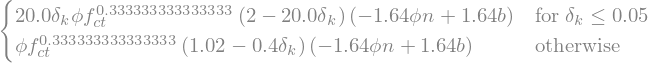

In [61]:
V_da = sp.Piecewise(
    (V_dmax * (delta_k/0.05) * (2 - (delta_k/0.05)), delta_k <= 0.05),
    (V_dmax * ((2.55 - delta_k) / 2.5), delta_k > 0.05)
    ) 
V_da

In [62]:
params = {
         b : 100,
         n : 5,
         phi : 10,
         f_ct : 3
         }

In [63]:
get_V_da = sp.lambdify((delta_k), V_da.subs(params), 'numpy')
get_V_da

<function _lambdifygenerated(Dummy_172)>

No handles with labels found to put in legend.


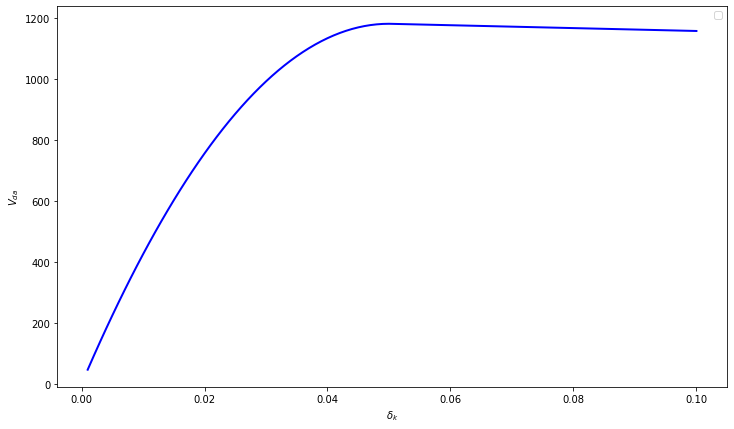

In [81]:
_, (ax1) = plt.subplots(1, 1, figsize=(12,7))
delta_k_ = np.linspace(0.001, 0.1, 100)
V_da_val = get_V_da(delta_k_)
ax1.plot(delta_k_, V_da_val, color='blue', lw=2);
ax1.set_xlabel(r'$\delta_k$'); ax1.set_ylabel(r'$V_{da}$')
ax1.legend()